# Bài tập về nhà 3
### Môn: Linear Algebra

In [1]:
import numpy as np

### Bài tập 1
Hàm $x(t)$ thỏa mãn phương trình vi phân:
$$L[x(t)]=\dfrac{d^2\,x}{dt^2}+e^t\dfrac{d\,x}{dt}+x=0$$
với điều kiện biên:
$$x(0)=0\ \ \hbox{và}\ \ x(2)=1$$
Theo phương pháp **`'collocation method'`**, nghiệm xấp xỉ của bài toán được tìm dưới dạng:
$$x(t)\approx x_n(t)=\sum^n_{i=0}\alpha_i\,t^{i}$$
thỏa mãn $x_n(0)=0$ và $x_n(2)=1$. Để xác định các hệ số $\alpha_i$, ta chọn $n-1$ điểm $t_j\in(0,2)$ sao cho $L[x_n(t_j)]=0$, với $j=1,\dots,n-1$.

Hãy tìm nghiệm xấp xỉ trong trường hợp $n=4$ và $t_1=0.5$, $t_2=1.0$, $t_3=1.5$.

In [10]:
# Hệ số của alpha_i trong khai triển L[x_n(t)]
def f(t,i):
    if i==0:
        return 1
    elif i==1:
        return np.exp(t)+t
    else:
        return (i*(i-1+t*np.exp(t))+t**2)*pow(t,i-2)

# Khởi tạo ma trận hệ số A và b
bound1=np.array([1,0,0,0,0])
bound2=np.array([1,2,4,8,16])
A=np.vstack([bound1,bound2])
points = np.array([0.5,1.0,1.5])
for t in points:
    row = np.array([f(t,i) for i in range(5)])
    A = np.vstack([A,row])
print(A)
b=np.array([0,1,0,0,0])

# Giải hệ phương trình để tìm các hệ số alpha
np.linalg.solve(A,b)

[[ 1.          0.          0.          0.          0.        ]
 [ 1.          2.          4.          8.         16.        ]
 [ 1.          2.14872127  3.89872127  4.36154095  3.88686064]
 [ 1.          3.71828183  8.43656366 15.15484549 23.87312731]
 [ 1.          5.98168907 17.69506721 42.62640122 92.56530245]]


array([ 0.        ,  2.6358415 , -1.91242764,  0.40184822,  0.01020261])

### Bài tập 2
Dữ liệu sau là về số transitor $N$ trên 1 chíp vi xử lý theo năm sản xuất $t$:

| Year | 1971 | 1972 | 1974 | 1978 | 1982 | 1985 | 1989 |
|---:|:---|:---|:---|:---|:---|:---|:---|
| Transitors |2,250|2,500|5,000|29,000|120,000|275,000|1,180,000|

| Year |  1993 | 1997 | 1999 | 2000|2002|2003|
|---:|:---|:---|:---|:---|:---| :---|
| Transitors |3,100,000|7,500,000|24,000,000|42,000,000|220,000,000|410,000,000|

Xây dựng mô hình $\log_{10}N\approx\theta_1+\theta_2(t-1970)$ phù hợp với dữ liệu.

Mô hình hồi quy: log10(N)=3.126+0.154*(t-1970)


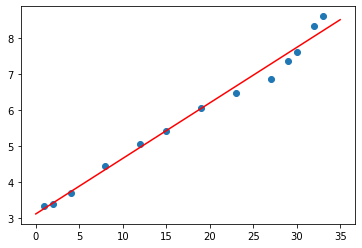

In [11]:
# Xây dựng mô hình
x_d = np.array([1971,1972,1974,1978,1982,1985,1989,1993,1997,
             1999,2000,2002,2003])-1970
y_d = np.log10(np.array([2250,2500,5000,29000,120000,275000,1180000,3100000,
             7500000,24000000,42000000,220000000,410000000]))
X_m = np.vstack([np.ones(len(x_d)),x_d]).T
theta=tuple(np.linalg.lstsq(X_m,y_d,rcond=None)[0])
print("Mô hình hồi quy: log10(N)=%0.3f+%0.3f*(t-1970)"%theta)

# Vẽ đồ thị
x = np.linspace(0,35,100)
y_reg = theta[0]+theta[1]*x
plt.scatter(x_d,y_d)
plt.plot(x,y_reg,'r')
plt.show()

### Bài tập 3
Tải dữ liệu về (số năm kinh nghiệm,thu nhập) từ file **salary_data.csv** vào mảng (sử dụng thư viện pandas). Sử dụng thư viện **Scikit-Learn** để xây dựng hàm hồi quy tuyến tính phù hợp nhất với dữ liệu, mô tả thu nhập theo số năm kinh nghiệm.

In [12]:
import pandas as pd
data = pd.read_csv("salary_data.csv")
x = data["YearsExperience"].values
y = data["Salary"].values
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Mô hình: y=25792.200199+9449.962321x


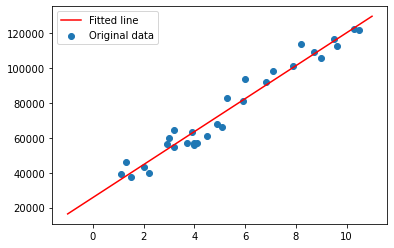

In [13]:
from sklearn.linear_model import LinearRegression

# Xây dựng mô hình
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X, y)
print("Mô hình: y=%f+%fx"%(model.intercept_,model.coef_[0]))

# Vẽ đồ thị
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x,y,label='Original data')
plt.plot(xfit,yfit,'r',label='Fitted line')
plt.legend()
plt.show()